In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from Custom_Logistic_Regression import LogisticRegression as CustomLogisticRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dataset/heart.csv")
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Columns Semnification


| Feature | Description |
| ------- | ----------- |
| Age | Age of the patient [years] |
| Sex | Sex of the patient [M: Male, F: Female] |
| ChestPainType | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| RestingBP | Resting blood pressure [mm Hg] |
| Cholesterol | Serum cholesterol [mm/dl] |
| FastingBS | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] |
| RestingECG | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| MaxHR | Maximum heart rate achieved [Numeric value between 60 and 202] |
| ExerciseAngina | Exercise-induced angina [Y: Yes, N: No] |
| Oldpeak | Oldpeak = ST [Numeric value measured in depression] |
| ST_Slope | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] |
| HeartDisease | Output class [1: heart disease, 0: Normal] |

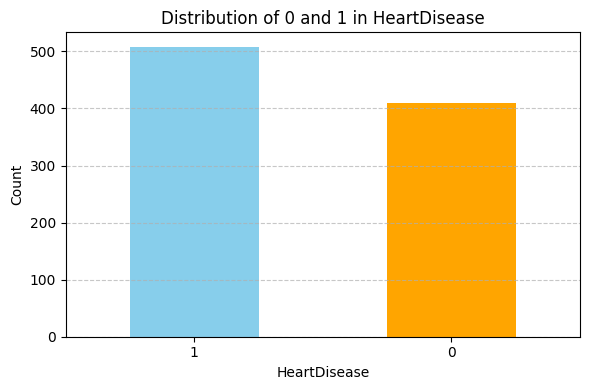

In [5]:
target_col = "HeartDisease"
target_values = df[target_col]

value_counts = target_values.value_counts()
value_counts.plot(kind="bar", color=["skyblue", "orange"], figsize=(6, 4))
plt.title("Distribution of 0 and 1 in HeartDisease")
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Encode Object Columns with LabelEncoder


In [6]:

def encode_object_columns(df):
    obj_cols=df.select_dtypes(include=["object"]).columns
    for col in obj_cols:
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
    return df

df=encode_object_columns(df)
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [7]:
corr_matrix = df.corr()[target_col].abs().sort_values(ascending=False)
corr_matrix

HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
Oldpeak           0.403951
MaxHR             0.400421
ChestPainType     0.386828
Sex               0.305445
Age               0.282039
FastingBS         0.267291
Cholesterol       0.232741
RestingBP         0.107589
RestingECG        0.057384
Name: HeartDisease, dtype: float64

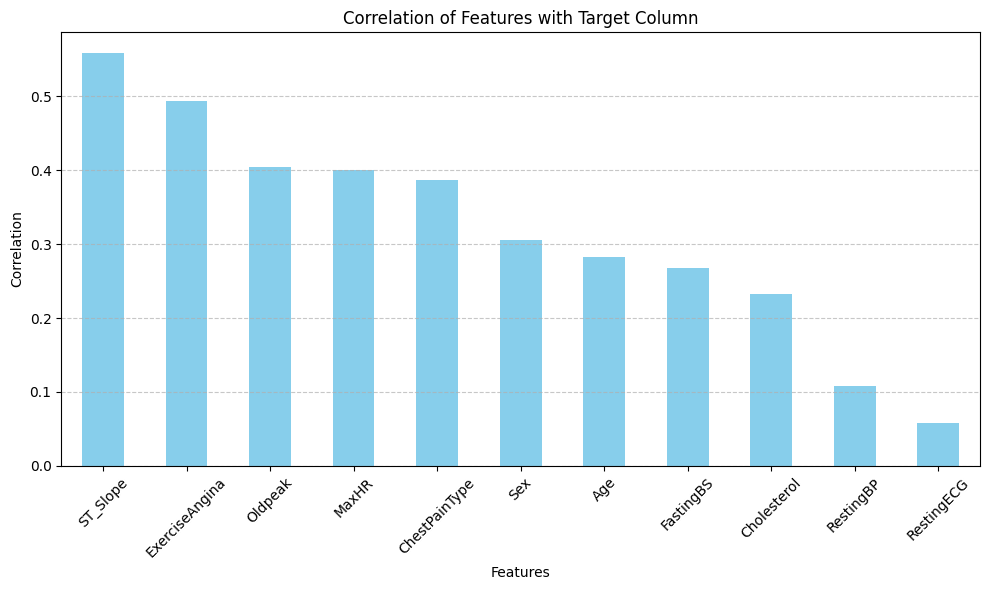

In [8]:

corr_matrix.drop(target_col).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Correlation of Features with Target Column')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Heart Health Basics ❤️

Here’s why four key metrics matter for your ticker! 🩺

## ST_Slope 🌱
- **What?** Shows how fast your heart pumps blood during exercise.  
- **Why?** A weird slope might mean oxygen isn’t flowing right—could signal artery trouble! 🚨

## Exercise_Angina 😓
- **What?** Chest discomfort when you move.  
- **Why?** Even light exercise causing pain? Might hint at heart rhythm issues or blockages. Stay alert! ⚡

## Oldpeak 📏
- **What?** ST segment change from rest to effort (ECG stuff!).  
- **Why?** Big shifts can flag past heart damage or ischemia. A key clue! 🔍

## Max_HR 💓
- **What?** Top heartbeats during max effort.  
- **Why?** Too low? Could mean your heart’s struggling under stress. Time to check it! 🏃‍♂️

Together, they spot heart risks early! 🌟

## Select Significant Features more than 0.49

In [9]:
selected_features = corr_matrix[(corr_matrix > 0.49)].index.tolist()
df_selected = df[selected_features]
selected_features

['HeartDisease', 'ST_Slope', 'ExerciseAngina']

## 📌Train and Evaluate Full Dataset

In [10]:
# HeartDisease is the target column

X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Scale numeric data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🚀Score

In [12]:
sklearn_logistic_regression = LogisticRegression(max_iter=1000,random_state=42)
sklearn_logistic_regression.fit(X_train_scaled, y_train)
sklearn_score=sklearn_logistic_regression.score(X_test_scaled, y_test)
print("Sklearn Logistic Regression Score", sklearn_score)

Sklearn Logistic Regression Score 0.8768115942028986


In [13]:
custom_logistic_regression = CustomLogisticRegression()
custom_logistic_regression.fit(X_train_scaled, y_train)
custom_score = custom_logistic_regression.score(X_test_scaled, y_test)
print("Custom Logistic Regression Score", custom_score)

This print is called from custom Logistic Regression class to make sure it is working correctly
Custom Logistic Regression Score 0.8586956521739131


## 📌Train and Evaluate model using significant columns from Dataset

In [14]:
# HeartDisease is the target column

X = df_selected.drop(columns=[target_col])
y = df_selected[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🚀Score

In [16]:
sklearn_logistic_regression = LogisticRegression(max_iter=10, random_state=42)
sklearn_logistic_regression.fit(X_train_scaled, y_train)
sklearn_score = sklearn_logistic_regression.score(X_test_scaled, y_test)
print("Score", sklearn_score)

Score 0.8115942028985508


In [17]:
custom_logistic_regression = CustomLogisticRegression()
custom_logistic_regression.fit(X_train_scaled, y_train,verbose=True)
custom_score = custom_logistic_regression.score(X_test_scaled, y_test)
print("Custom Score", custom_score)

Iteration 0, Loss: 0.6931471805599435
Iteration 100, Loss: 0.5869070374258525
Iteration 200, Loss: 0.5325777839573415
Iteration 300, Loss: 0.5026469970231571
Iteration 400, Loss: 0.48498116191745727
Iteration 500, Loss: 0.47396098055060704
Iteration 600, Loss: 0.4667810359419101
Iteration 700, Loss: 0.4619397088640519
Iteration 800, Loss: 0.45858443354855905
Iteration 900, Loss: 0.4562068245594015
This print is called from custom Logistic Regression class to make sure it is working correctly
Custom Score 0.8115942028985508



# Overview
- Conducted thorough analysis of data types in the dataset ✅
- Identified string columns and their characteristics ✅
- Verified columns for null values ✅
- Analyzed target column distribution (found to be well-balanced) ✅

### Data Preprocessing 
- Applied LabelEncoder to convert object type columns to numeric format ✅
  - Algorithm performed efficiently even with columns containing only 2-3 distinct values ✅
- Identified correlations between features and target variable ✅
- Implemented data scaling to improve model performance ✅
  - This was especially important as Logistic Regression is sensitive to unscaled data ✅
  - Scaling improved Custom Linear Regression score by approximately 20% ✅

## Model Training
Two separate models were trained:
1. **Full Feature Model**: Used all available columns in the dataset
2. **Selected Feature Model**: Used only columns with correlation values between 0.49 and 0.8 with the target

## Results
- Both models produced satisfactory results
- The performance difference between the custom implementation and sklearn's Logistic Regression implementation was not statistically significant